# Benchmark structural regression 

In [198]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [204]:
evaluation_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/"

In [510]:
for i in range(1):
    print(i+1)

1


In [615]:
### parse trace files
def parse_trace(result_dir):
    f = os.path.basename(result_dir)
    name_trace = ".command.trace"
    trace = join(result_dir, name_trace)
    df = pd.read_csv(trace, sep = "=").T
    df = df.rename(index={'nextflow.trace/v2': f})
    return(df)

def split_name(df):
    df[["family", "method", "bucket_size", "dynamicX_label","dynamicX_val",
               "master_msa", "master_batch",
               "slave_msa", "slave_batch","tree"]] = df.name.str.split(".", expand = True)
    return(df)


### Collect all computation files across directories 
def get_computation_times(evaluation_dir, dataset, task, extralevel = False):
    # Extract trace files w/ corresponding alignments
    traces = pd.DataFrame()
    alignments_dir = join(evaluation_dir,task)
    for fam in listdir(alignments_dir):
        family_dir=join(alignments_dir, fam)
        
        
        # remove extra level if needed
        if extralevel == False:
            family_dir = alignments_dir
            
        for f in listdir(family_dir):
            result_dir = join(family_dir,f)
            if(os.path.isdir(result_dir)):
                df = parse_trace(result_dir)
                traces = traces.append(df)
        if extralevel == False:
            break
    # Trace files parsed
    traces = traces.reset_index(level=0)
    traces = traces.rename(columns={'index': 'name'})
    traces["benchmarking_dataset"] = dataset
    traces = split_name(traces)
    traces["task"] = task
    return(traces)

In [325]:
def add_families(trees_traces):
    trees_traces["family"] = trees_traces.name.str.split(".",expand=True)[0]
    trees_traces["tree_method"] = trees_traces.name.str.split(".",expand=True)[1]
    return(trees_traces)

#### Load datasets informations (Homfam + extHomfam)

In [617]:
summary_homfam_exthomfam = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/01_summary_homfam_exthomfam.csv")
summary_homfam_exthomfam = summary_homfam_exthomfam.rename(columns={"dataset": "benchmarking_dataset"})
summary_homfam_exthomfam.head(2)

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group,perc_ref_total,benchmarking_dataset
0,rvp,combined,93681,94.288554,22,133,rvp,xlarge,0.006405,homfam
1,zf-CCHH,combined,88345,23.251265,12,35,zf-CCHH,xlarge,0.016979,homfam


# <div style="text-align: center;"> <span align="center" style="color:blue">_________TREES_________</span> </div>


In [570]:
trees_traces_homfam = get_computation_times(join(evaluation_dir, "homfam"), "homfam", "trees", extralevel=True)
trees_traces_homfam = add_families(trees_traces_homfam)

trees_traces_exthomfam_v35 = get_computation_times(join(evaluation_dir, "extHomfam_v35-uniprot"), "extHomfam_v35-uniprot", "trees", extralevel=True)
trees_traces_exthomfam_v35 = add_families(trees_traces_exthomfam_v35)

trees_traces = pd.concat([trees_traces_homfam, trees_traces_exthomfam_v35])

stat_trees = pd.merge(trees_traces, summary_homfam_exthomfam, on =["family","benchmarking_dataset"])
stat_trees.head(2)

,name,realtime,%cpu,rchar,wchar,syscr,syscw,read_bytes,write_bytes,%mem,...,family,tree_method,subset,n_sequences,mean_length,min_length,max_length,file,size_group,perc_ref_total
0,il8.FAMSA-parttree,81,600,138715,30817,142,22,1024000,32768,0,...,il8,FAMSA-parttree,combined,1073,63.762349,18,82,il8,small,1.025163
1,il8.FAMSA-medoid,379,829,138725,30822,142,22,1024000,32768,0,...,il8,FAMSA-medoid,combined,1073,63.762349,18,82,il8,small,1.025163


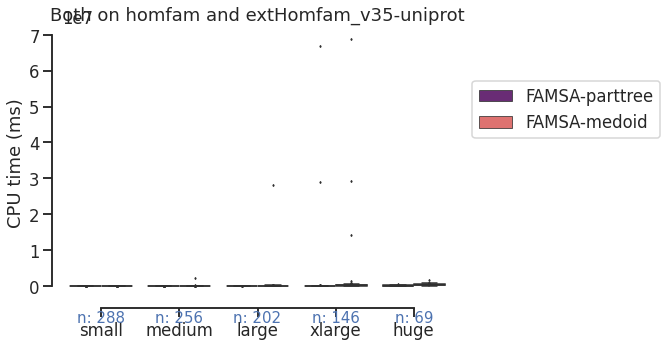

In [581]:

sns.set_theme(style="ticks")
sns.set_context("talk")

# Load the example tips dataset
f, ax = plt.subplots(figsize=(7, 5))
df = stat_trees
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="size_group", y="realtime",
            hue="tree_method", palette = "magma",
            data=df, linewidth=1.5, fliersize = 1.5, dodge = True)

# Calculate number of obs per group & median to position labels
nobs = df['size_group'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            -10050000,
            nobs[tick],
            horizontalalignment='center',
            size='small',
            color='b')
 


ax.set(ylabel='CPU time (ms)', xlabel='', title = "Both on homfam and extHomfam_v35-uniprot")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)

sns.despine(offset=10, trim=True)
#f, ax = plt.subplots(figsize=(7, 7))
#sns.scatterplot(data=stat_trees, y="realtime", x="n_sequences", hue="tree_method",
#                palette = "magma",style = "benchmarking_dataset", s = 30)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.set(ylabel='CPU time (ms)', xlabel='number of sequences')

# <div style="text-align: center;"> <span align="center" style="color:red">_________Computation times_________</span> </div>

In [ ]:
# Load AF2

In [632]:
# ---------- EXTRACT SEQUENCES ---------------
traces_extracted_sequences_homfam = get_computation_times(join(evaluation_dir, "homfam"), "homfam", "seqs_extracted")

In [ ]:
# ---------- AF2 PREDICTIONS -------------------------


In [595]:
# ---------- ALIGNMENTS -------------------------
traces_alignments_homfam = get_computation_times(join(evaluation_dir, "homfam"), "homfam", "alignments")

In [605]:
# ---------- CONCATENATE AL OF THEM IN ONE ---------------
traces = traces_extracted_sequences_homfam

In [634]:
traces.head(1)

,name,realtime,%cpu,rchar,wchar,syscr,syscw,read_bytes,write_bytes,%mem,...,family,method,bucket_size,dynamicX_label,dynamicX_val,master_msa,master_batch,slave_msa,slave_batch,tree
0,seatoxin.dynamic.100.dynamicX.100000.tcoffee_m...,1426,72,127181,21249,223,33,1553408,40960,0,...,seatoxin,dynamic,100,dynamicX,100000,tcoffee_msa,100,famsa_msa,100000000,FAMSA-parttree


# <div style="text-align: center;"> <span align="center" style="color:pink">_________Evaluation_________</span> </div>

In [635]:
# Load AF2 scores
af2 = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/02_summary_af2.csv")
af2_grouped = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/03_summary_af2_grouped.csv")

,family,benchmarking_dataset,plddt_mean,plddt_min,plddt_max
0,hip,homfam,71.948558,55.1243,82.6511


In [606]:
def get_evaluation(evaluation_dir, dataset):
    scores = evaluation_dir + "/CSV/dynamic.scores.csv"
    scores_df = pd.read_csv(scores, sep=";", header = None).iloc[: , :-1]
    scores_df.set_axis(list(["name", "sp","tc", "column"]), axis=1, inplace=True)
    scores_df[["family", "method", "bucket_size", "dynamicX_label","dynamicX_val",
               "master_msa", "master_batch",
               "slave_msa", "slave_batch","tree"]] = scores_df.name.str.split(".", expand = True)
    scores_df["benchmarking_dataset"] = dataset
    return(scores_df)

In [607]:
scores_df_homfam = get_evaluation(join(evaluation_dir,dataset), dataset)

In [611]:
## TODO -- add exthomfam
scores_df = scores_df_homfam
scores_df

,name,sp,tc,column,family,method,bucket_size,dynamicX_label,dynamicX_val,master_msa,master_batch,slave_msa,slave_batch,tree,benchmarking_dataset
0,hip.dynamic.100.dynamicX.100000.tcoffee_msa.10...,80.1,50.0,61.5,hip,dynamic,100,dynamicX,100000,tcoffee_msa,100,famsa_msa,100000000,FAMSA,homfam
1,seatoxin.dynamic.100.dynamicX.100000.tcoffee_m...,70.8,26.5,25.7,seatoxin,dynamic,100,dynamicX,100000,tcoffee_msa,100,famsa_msa,100000000,FAMSA,homfam


# <div style="text-align: center;"> <span align="center" style="color:lightgrey">_________MERGE_________</span> </div>

In [619]:
stats = pd.merge(scores_df, traces, on = "name")
stats = pd.merge(stats, summary_homfam_exthomfam, on =["family","benchmarking_dataset"])
stats.head()

KeyError: 'family'

summary_homfam_exthomfam

In [626]:
pd.merge(scores_df, traces, on = "name")

,name,sp,tc,column,family_x,method_x,bucket_size_x,dynamicX_label_x,dynamicX_val_x,master_msa_x,...,family_y,method_y,bucket_size_y,dynamicX_label_y,dynamicX_val_y,master_msa_y,master_batch_y,slave_msa_y,slave_batch_y,tree_y


In [629]:
scores_df.name[1]

'seatoxin.dynamic.100.dynamicX.100000.tcoffee_msa.100.famsa_msa.100000000.FAMSA'

In [630]:
traces.name[1]

'seatoxin.dynamic.100.dynamicX.100000.tcoffee_msa.100.famsa_msa.100000000.FAMSA-medoid'